In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline
import seaborn as sns

In [2]:
#Setting paths and reading the required files
whale_returns_csv = Path("../Whale_Analysis/whale_returns.csv")
algo_returns_csv = Path("../Whale_Analysis/algo_returns.csv")
sp500_history_csv = Path("../Whale_Analysis/sp500_history.csv")

whale_returns_data = pd.read_csv(whale_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_returns_data = pd.read_csv(algo_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_history_data = pd.read_csv(sp500_history_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [3]:
#counting and dropping the null values for whale data
whale_returns_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
clean_whale_data=whale_returns_data.dropna()

In [5]:
clean_whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [6]:
#counting and dropping the null values for algo data
algo_returns_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
clean_algo_data=algo_returns_data.dropna()

In [8]:
clean_algo_data.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [9]:
#converting from history to daily returns, changing data type, counting and dropping the null values for sp500 data
ascending_sp500_data=sp500_history_data.sort_values(by='Date',ascending=True)
ascending_sp500_data['Close']=ascending_sp500_data['Close'].str.replace('$','')
ascending_sp500_data=ascending_sp500_data.astype(float)
sp500_returns_data=ascending_sp500_data.pct_change()
clean_sp500_data=sp500_returns_data.dropna()
clean_sp500_data.columns=['SP500']

In [10]:
clean_sp500_data.head()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [11]:
#putting all the data together
joined_data=pd.concat([clean_whale_data, clean_algo_data, clean_sp500_data], axis='columns', join='inner')

In [12]:
joined_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


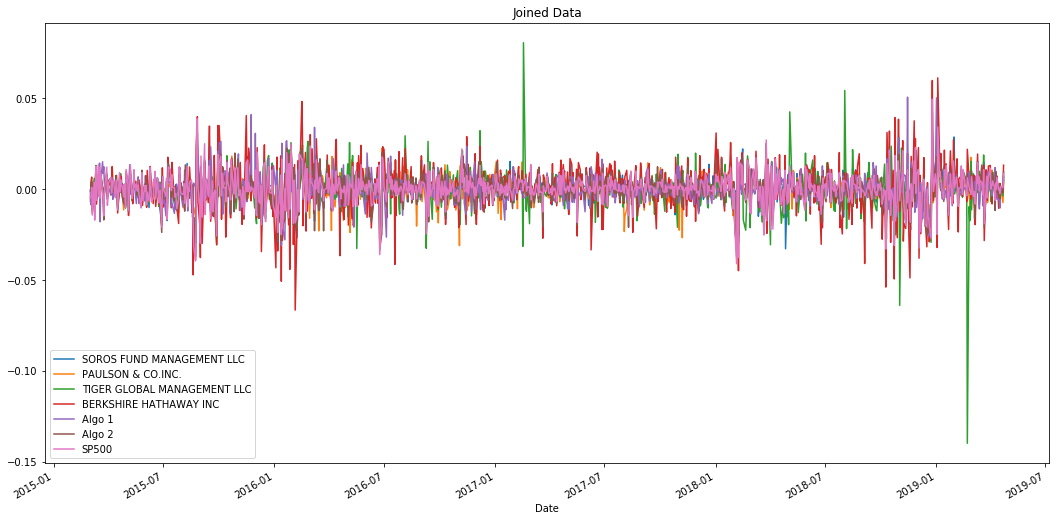

In [37]:
#daily returns
joined_data.plot(figsize=(18,9), title='Joined Data')

In [14]:
#cumulative returns
cumulative_returns = (1 + joined_data).cumprod() - 1
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,-0.008907
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,-0.007722
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,-0.021786
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,-0.017928


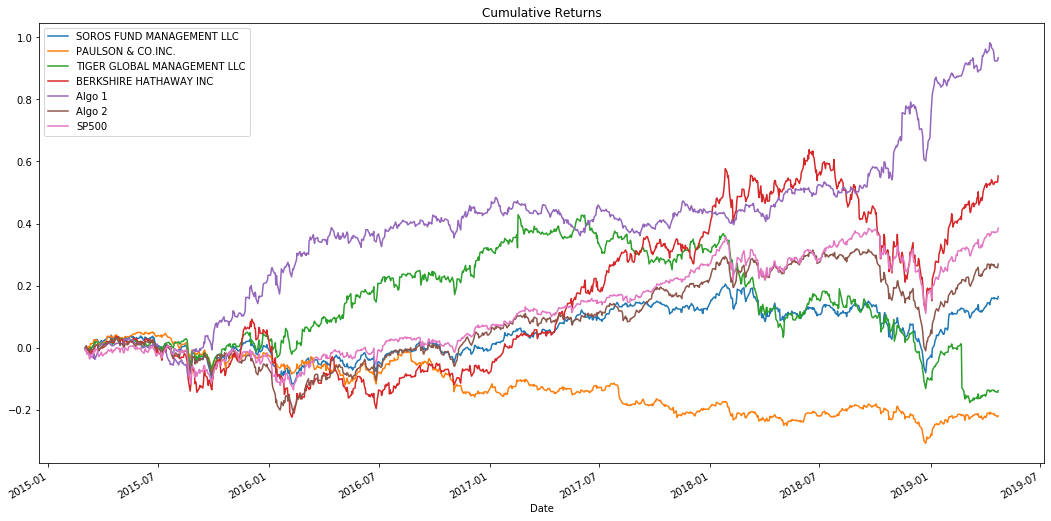

In [38]:
cumulative_returns.plot(figsize=(18,9), title='Cumulative Returns')

Algo 1 and Berkshire Hathaway Inc seems to have done better than S&P 500 as they are sitting in a higher position according to the cumulative return plot above.

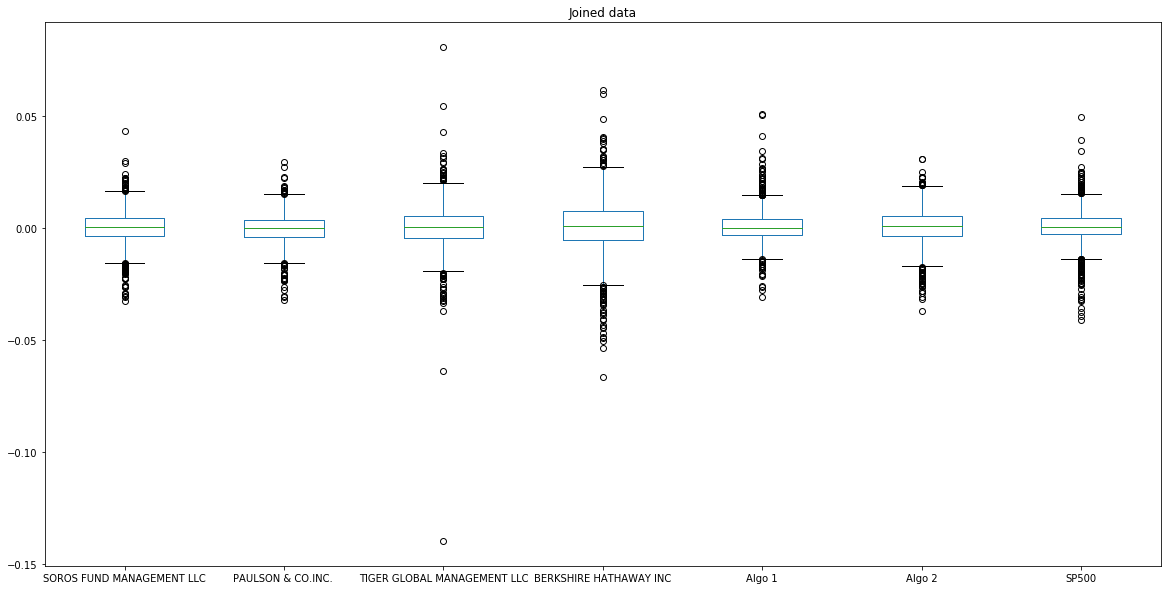

In [39]:
joined_data.plot.box(figsize=(20,10), title='Joined data')

In [17]:
daily_std=joined_data.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500                          0.008554
dtype: float64

In [18]:
# write a code to determine which portfolios are riskier than the S&P 500 
SP500_value= daily_std['SP500']
for x in daily_std:
    if x > SP500_value:
        print ('True')
    else:
        print ('False')

False
False
True
True
False
False
False


Tiger Global Management LLC and Berkshire Hathaway INC are riskier than the S&P 500 as the daily standard deviation for those two portfolios are greater than S&P 500 portfolio.

In [19]:
#Calculation of annualize standard deviation
annual_std = joined_data.std() * np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500                          0.135786
dtype: float64

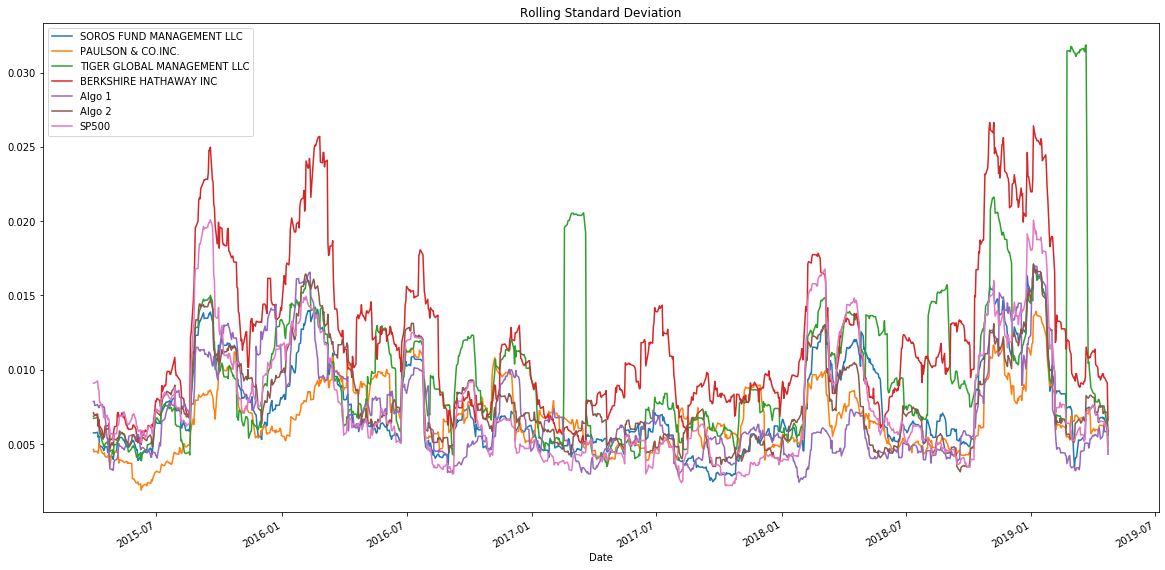

In [40]:
#ROLLING STATISTICS
joined_data.rolling(window=21).std().plot(figsize=(20,10), title='Rolling Standard Deviation')

Other than Tiger Global Management Llc and Berkshire Hathaway Inc, all the stock's risk seems to increase at the same time as S&P 500 portfolio

In [21]:
correlation=joined_data.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


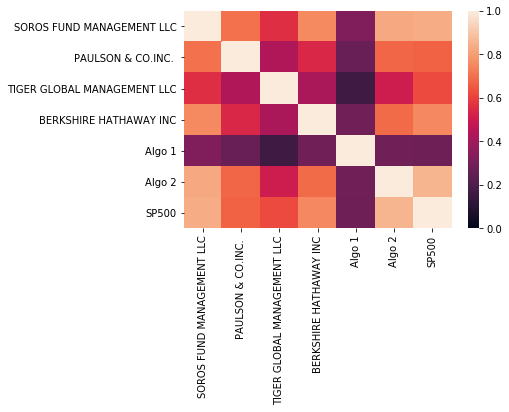

In [22]:
sns.heatmap(correlation, vmin=0, vmax=1)

According to the heatmap and the correlation table, S&P 500 is mostly correlated with Algo 2 from algorithmic but it has the least correlation with algo 1 from the same dataset. S&P 500 has moderate to strong correlation with all the portfolios from whale, ranging from .62 to .84

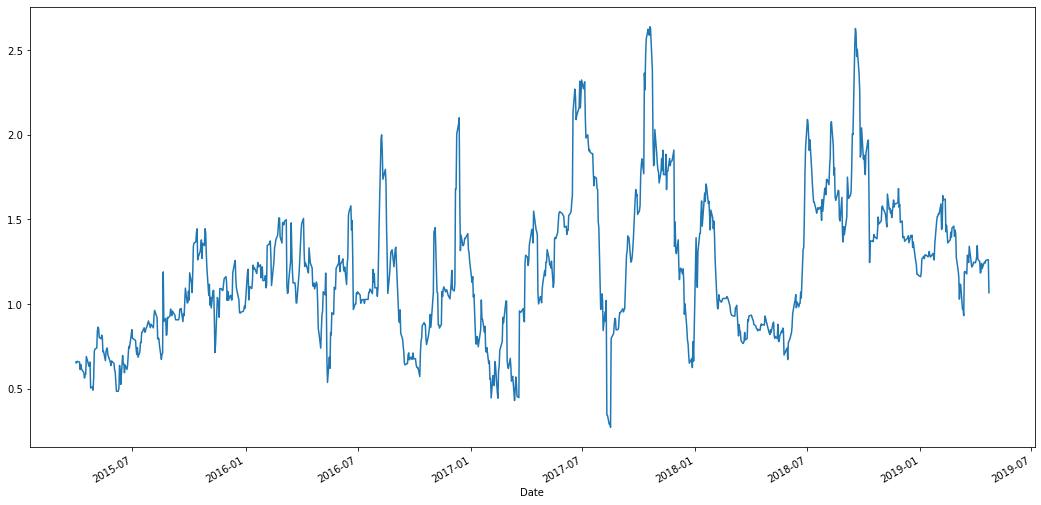

In [23]:
#Beta of SP500 vs Berkshire Hathaway Inc
rolling_bh_covariance = joined_data['BERKSHIRE HATHAWAY INC'].rolling(window=21).cov(joined_data['SP500'])
rolling_variance = joined_data['SP500'].rolling(window=21).var()
beta=rolling_bh_covariance/ rolling_variance
beta.plot(figsize=(18,9))

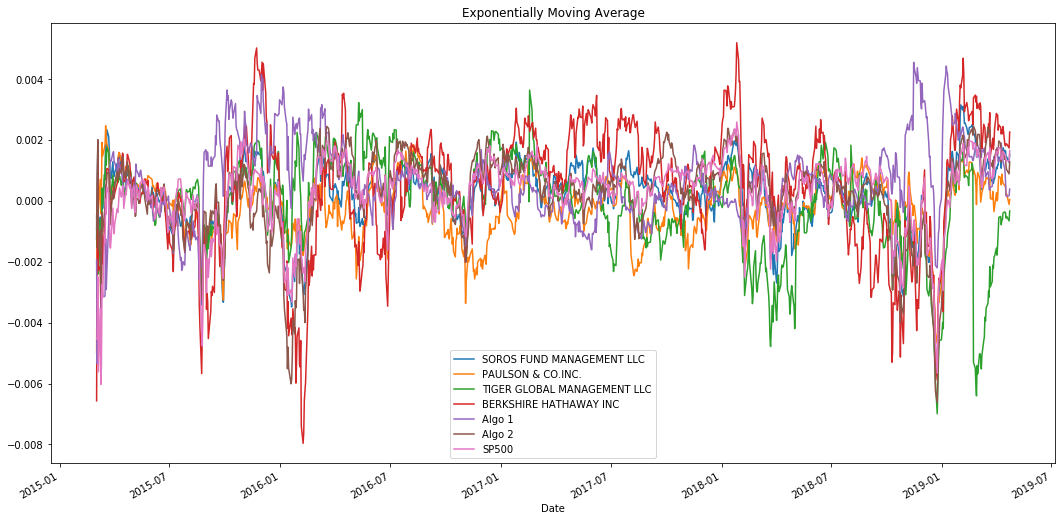

In [41]:
#EXPONENTIALLY MOVING AAVERAGE 
mean=joined_data.ewm(com=21).mean()
mean.plot(figsize=(18,9), title='Exponentially Moving Average')

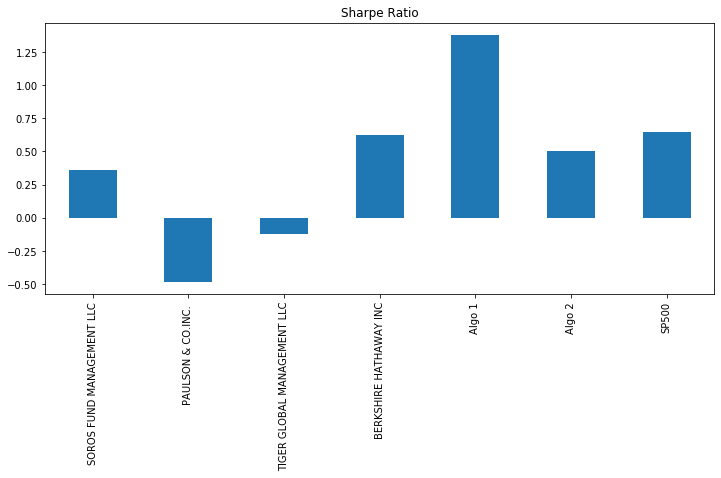

In [25]:
sharpe_ratios = (joined_data.mean() * 252) / (joined_data.std() * np.sqrt(252))
sharpe_ratios.plot(kind='bar', figsize=(12,5), title="Sharpe Ratio")

The Algo strategies seems to have outperformed both the market and the whales. The fact that algo strategy had the best sharpe ratio (risk-adjusted return), it shows that they have taken calculated risk to maximize possible returns.

In [26]:
#Custom analysis
amazon_csv = Path("../Whale_Analysis/amazon.csv")
alibaba_csv = Path("../Whale_Analysis/alibaba.csv")
glu_csv = Path("../Whale_Analysis/glu.csv")
lumentum_csv = Path("../Whale_Analysis/lumentum.csv")
shopify_csv = Path("../Whale_Analysis/shopify.csv")

amazon_data = pd.read_csv(amazon_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
alibaba_data = pd.read_csv(alibaba_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
glu_data = pd.read_csv(glu_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
lumentum_data = pd.read_csv(lumentum_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
shopify_data = pd.read_csv(shopify_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [27]:
amazon_dr=amazon_data.pct_change()
amazon_dr=amazon_dr.dropna()

alibaba_dr=alibaba_data.pct_change()
alibaba_dr=alibaba_dr.dropna()

glu_dr=glu_data.pct_change()
glu_dr=glu_dr.dropna()

lumentum_dr=lumentum_data.pct_change()
lumentum_dr=lumentum_dr.dropna()

shopify_dr=shopify_data.pct_change()
shipofy_dr=shopify_dr.dropna()


In [28]:
#Combining all my stocks together
my_portfolio= pd.concat([amazon_dr, alibaba_dr, glu_dr, lumentum_dr, shopify_dr], axis='columns', join='inner')
my_portfolio.columns= ['Amazon', 'Alibaba', 'Glu Mobile', 'Lumentum', 'Shopify']
my_portfolio=my_portfolio.dropna()

In [29]:
#Calculating returns for the whole portfolio
weights= [.2,.2,.2,.2,.2]
custom = my_portfolio.dot(weights)
custom.head()

Date
2015-07-27    0.029776
2015-07-28    0.013138
2015-07-29   -0.003619
2015-07-30    0.024088
2015-07-31   -0.022231
dtype: float64

In [30]:
# Preparing the data for My Portfolio vs other portfolio Analysis
custom.columns=['Custom'] # <-- not sure why this code did not set the column name as "Custom" so I had to take the long way two lines below
combined_data= pd.concat([joined_data, custom], axis='columns', join='inner')
combined_data.columns=["SOROS FUND MANAGEMENT LLC", 'PAULSON & CO. INC', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'ALGO 1', 'ALGO 2','SP500', 'CUSTOM']
combined_data=combined_data.dropna()
combined_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO. INC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,ALGO 1,ALGO 2,SP500,CUSTOM
Date,,,,,,,,
2015-07-27,-0.008946,-0.012591,-0.008107,-0.018804,-0.004581,-0.010166,-0.005775,0.029776
2015-07-28,0.008597,0.002159,0.007026,0.008163,0.010567,0.006345,0.012386,0.013138
2015-07-29,0.007662,0.003382,0.007917,0.003607,0.011992,0.003721,0.007319,-0.003619
2015-07-30,0.000233,0.002116,0.003160,-0.002042,-0.002263,0.002934,0.000028,0.024088
2015-07-31,-0.002888,-0.001039,-0.001834,-0.000192,-0.003018,0.003568,-0.002272,-0.022231


In [31]:
# Annualized Standard Deviation for all portfolios 
custom_std = combined_data.std() * np.sqrt(252)
custom_std

SOROS FUND MANAGEMENT LLC      0.128582
PAULSON & CO. INC              0.115723
TIGER GLOBAL MANAGEMENT LLC    0.179606
BERKSHIRE HATHAWAY INC         0.212557
ALGO 1                         0.123166
ALGO 2                         0.135368
SP500                          0.137995
CUSTOM                         0.294777
dtype: float64

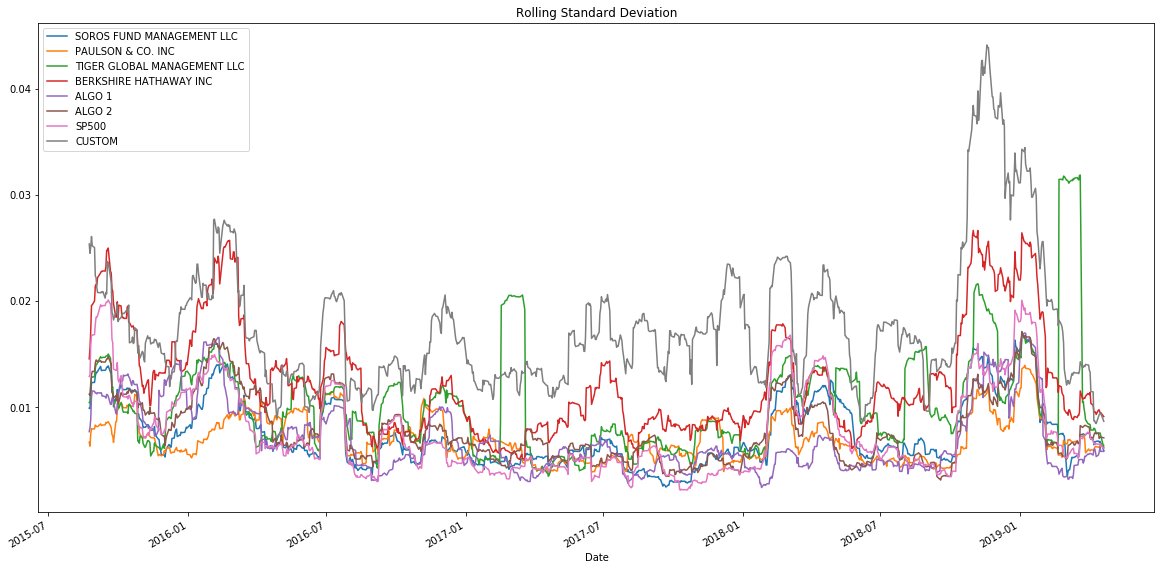

In [42]:
#Plotted rolling standard deviation using a 21 trading day window for all portfolios.
combined_data.rolling(window=21).std().plot(figsize=(20,10), title='Rolling Standard Deviation')

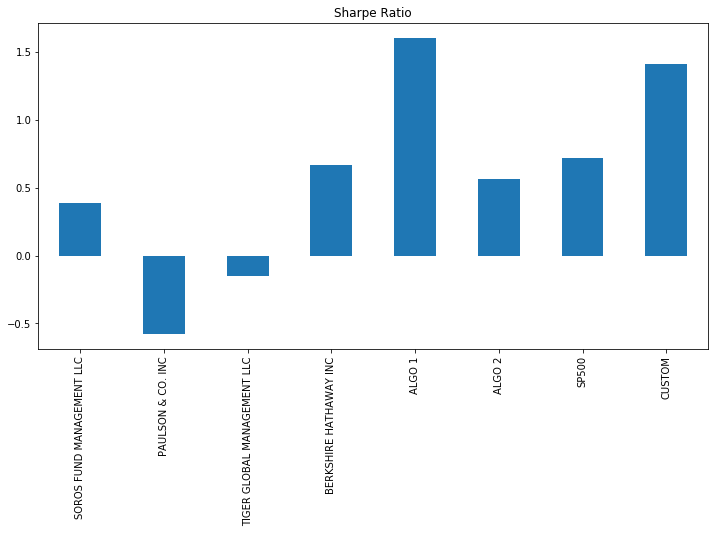

In [33]:
#Sharpe Ratio
custom_sharpe = (combined_data.mean() * 252) / (combined_data.std() * np.sqrt(252))
custom_sharpe.plot(kind='bar', figsize=(12,6), title="Sharpe Ratio")

In [34]:
#Correlation
custom_correlation=combined_data.corr()
custom_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO. INC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,ALGO 1,ALGO 2,SP500,CUSTOM
SOROS FUND MANAGEMENT LLC,1.000000,0.699471,0.553290,0.754384,0.321300,0.826859,0.839692,0.621806
PAULSON & CO. INC,0.699471,1.000000,0.427029,0.543742,0.274777,0.679908,0.672940,0.466763
TIGER GLOBAL MANAGEMENT LLC,0.553290,0.427029,1.000000,0.415926,0.165531,0.494857,0.613703,0.307356
BERKSHIRE HATHAWAY INC,0.754384,0.543742,0.415926,1.000000,0.296403,0.684925,0.755735,0.695420
ALGO 1,0.321300,0.274777,0.165531,0.296403,1.000000,0.296614,0.286003,0.226961
ALGO 2,0.826859,0.679908,0.494857,0.684925,0.296614,1.000000,0.857936,0.623757
SP500,0.839692,0.672940,0.613703,0.755735,0.286003,0.857936,1.000000,0.638372
CUSTOM,0.621806,0.466763,0.307356,0.695420,0.226961,0.623757,0.638372,1.000000


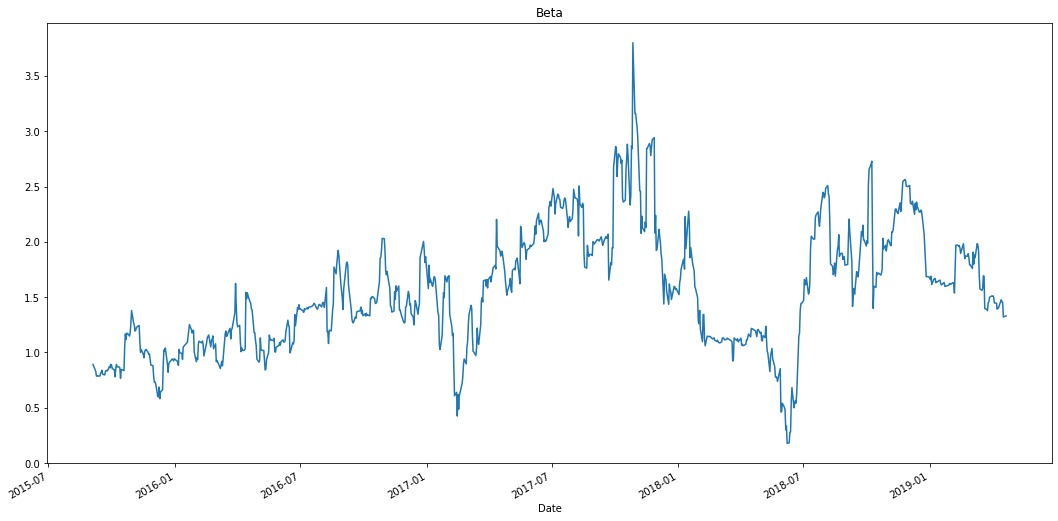

In [43]:
#Custom portfolio beta vs SP500
covariance = combined_data['CUSTOM'].rolling(window=30).cov(combined_data['SP500'])
variance = combined_data['SP500'].rolling(window=30).var()
custom_beta = covariance / variance
custom_beta.plot(figsize=(18,9), title='Beta')

My custom portfolio is a very high risk and high return portfolio. It has the highest standard deviation and the second highest sharpe ratio. It is not strongly correlated with any other portfolios I have worked with. Below, I have attached a graph of cumulative return to show that the risk taken for the custome portfolio have paid off.

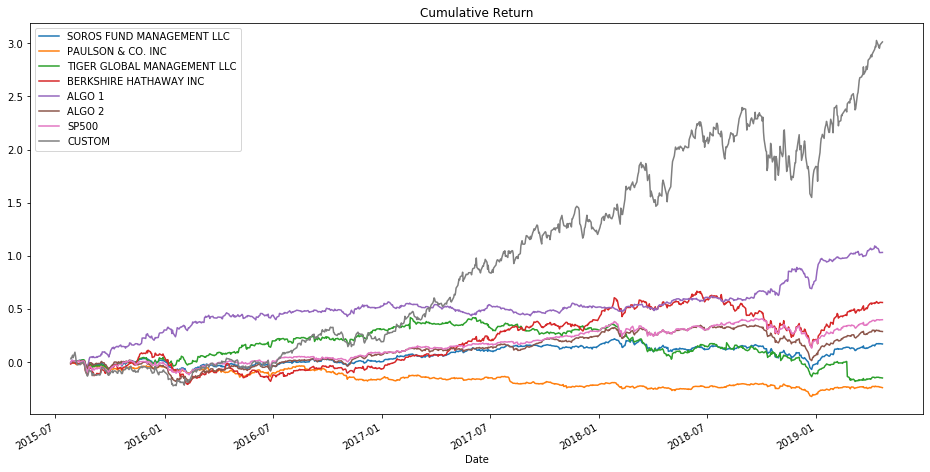

In [44]:
final_cumulative_returns = (1 + combined_data).cumprod() - 1
final_cumulative_returns.plot(figsize=(16,8), title='Cumulative Return')